In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
!pip install -U scikit-learn


## embedding visualization 

### using PCA reduce the dimention directly

In [65]:
# Load the data

data = pd.read_excel('pages_data.xlsx', sheet_name="all-MiniLM-L6-v2_384")
input_data = pd.read_excel('pages_data.xlsx', sheet_name="Sheet3")


PC_embedding = data[['Title', 'embedding_c']]
Summary_embedding = data[['Title', 'embedding_s']]


/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from c

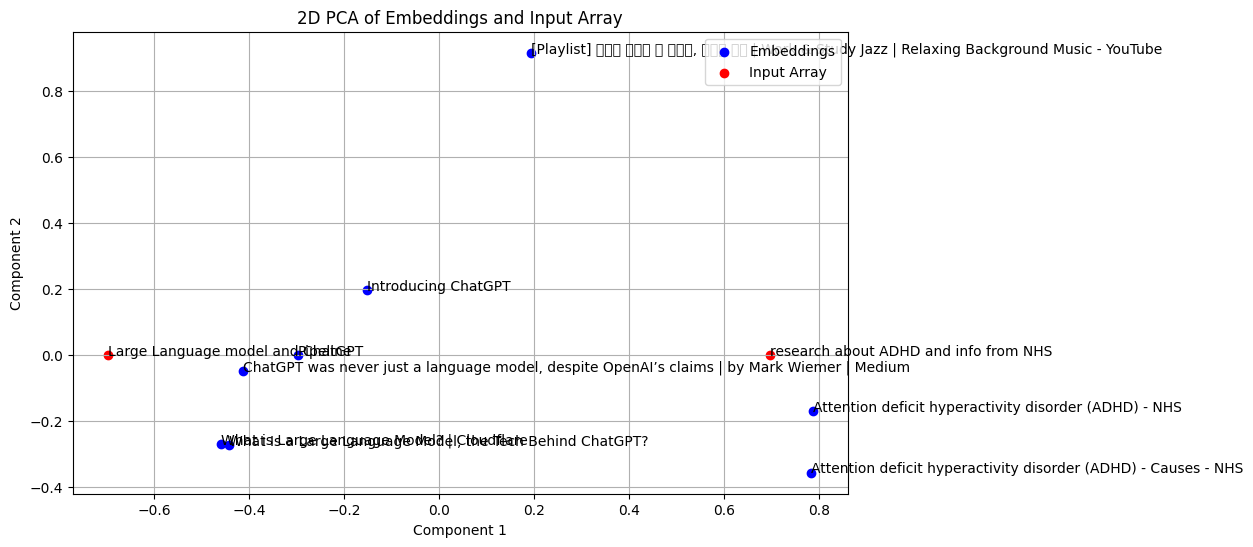

In [76]:
embeddings_array = PC_embedding['embedding_c'].values
PC_arrays = [np.array(eval(vector)) for vector in embeddings_array]
titles = PC_embedding['Title'].values

input = input_data['Embedding'].values
input_array = [np.array(eval(vector)) for vector in input]
task_topics = input_data['task topic'].values

# Perform PCA on the embeddings
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(PC_arrays)

# Plot the reduced vectors for embeddings
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='b', label='Embeddings')

# Add titles as annotations for embeddings
for i, title in enumerate(titles):
    plt.annotate(title, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

# Perform PCA on the input array
pca_input = PCA(n_components=2)
reduced_input = pca_input.fit_transform(input_array)

# Plot the reduced vectors for the input array
plt.scatter(reduced_input[:, 0], reduced_input[:, 1], c='r', label='Input Array')

# Add task topics as annotations for the input array
for i, topic in enumerate(task_topics):
    plt.annotate(topic, (reduced_input[i, 0], reduced_input[i, 1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Embeddings on page content and Input Array')
plt.legend()
plt.grid(True)
plt.show()

/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from c

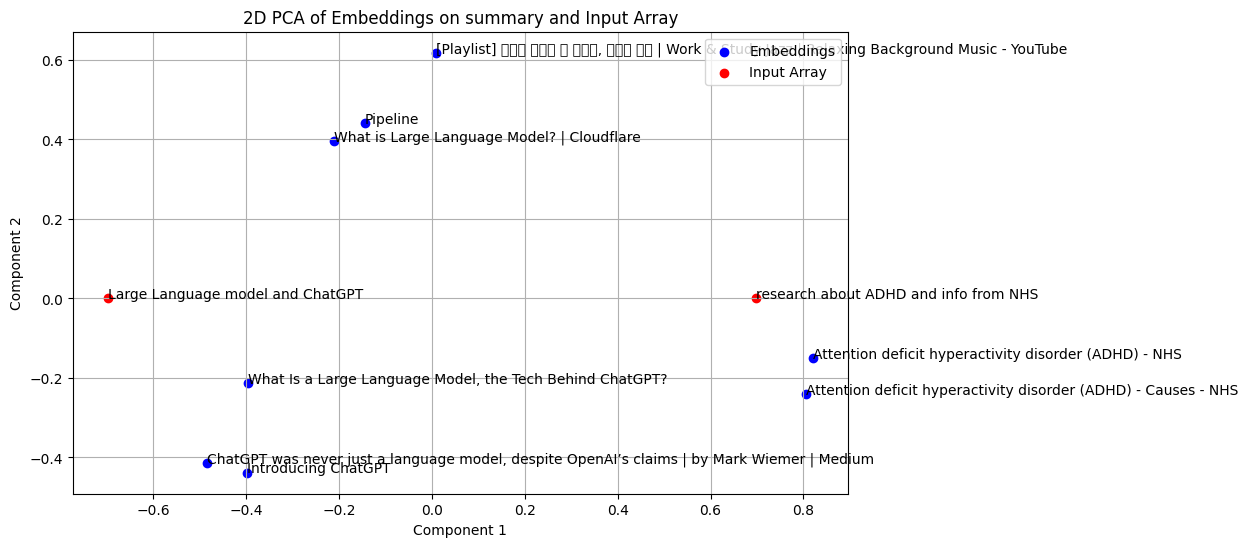

In [78]:
embeddings_s = Summary_embedding['embedding_s'].values
Summary_arrays= [np.array(eval(vector)) for vector in embeddings_s]

titles = PC_embedding['Title'].values


# Perform PCA on the embeddings
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(Summary_arrays)

# Plot the reduced vectors for embeddings
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='b', label='Embeddings')

# Add titles as annotations for embeddings
for i, title in enumerate(titles):
    plt.annotate(title, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

# Perform PCA on the input array
pca_input = PCA(n_components=2)
reduced_input = pca_input.fit_transform(input_array)

# Plot the reduced vectors for the input array
plt.scatter(reduced_input[:, 0], reduced_input[:, 1], c='r', label='Input Array')

# Add task topics as annotations for the input array
for i, topic in enumerate(task_topics):
    plt.annotate(topic, (reduced_input[i, 0], reduced_input[i, 1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Embeddings on summary and Input Array')
plt.legend()
plt.grid(True)
plt.show()



### reduce the dimension using t-sne

In [6]:
array_2d = [[-0.05556300721513484, -0.6769316576671516],
            [-0.3753715761660077, -0.03561942318800707],
            [1.1948996805500638, 0.7092152670507257],
            [-1.6998416048714686, -0.529111015226007],
            [-1.3240593616185383, 1.005654197520031],
            [-0.5841691742593845, 0.6875212559804453],
            [-0.41156010862035464, -0.5131336792342488],
            [1.8332065746161632, -0.6884045096268143]]

topic_2d = [[1.4224585775846614, 0.040809564391026815]]

title = ['[Playlist] 오롯이 혼자인 방 안에서, 그리고 재즈 | Work & Study Jazz | Relaxing Background Music - YouTube',
         'Attention deficit hyperactivity disorder (ADHD) - Causes - NHS',
         'Introducing ChatGPT',
         'Attention deficit hyperactivity disorder (ADHD) - NHS',
         'What is a large language model (LLM)? | Cloudflare',
         'pipelines',
         'ChatGPT was never just a language model, despite OpenAI’s claims | by Mark Wiemer | Medium',
         'What Is a Large Language Model, the Tech Behind ChatGPT?']

topic = ['research about ADHD and info from NHS']

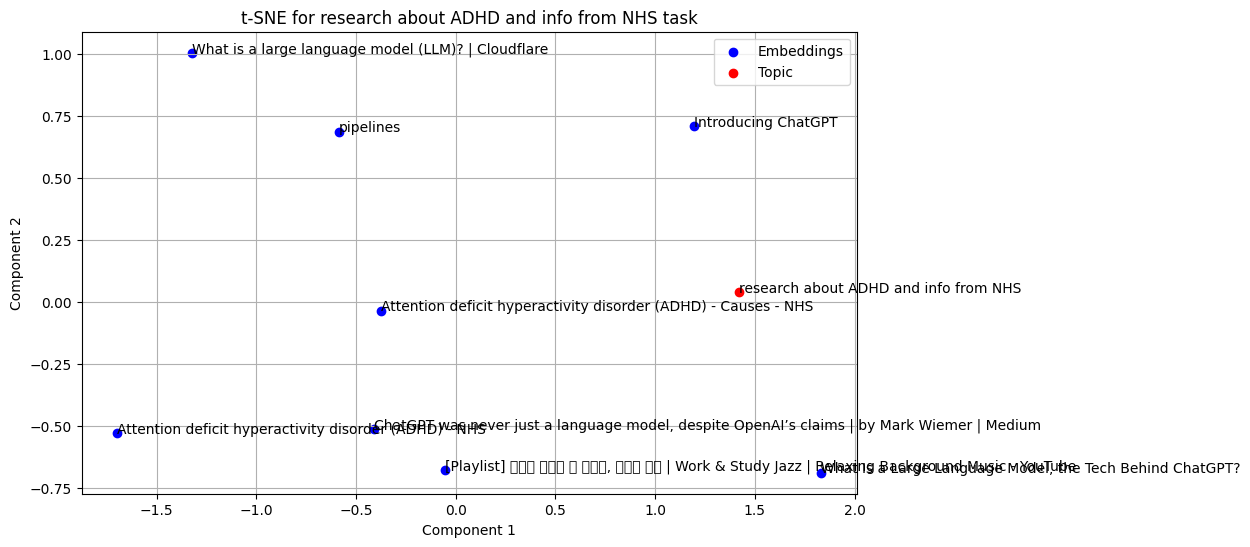

In [7]:
# draw the plot for the 2D array and the topic, topic use different color
plt.figure(figsize=(10, 6))
plt.scatter([x[0] for x in array_2d], [x[1] for x in array_2d], c='b', label='Embeddings')
plt.scatter([x[0] for x in topic_2d], [x[1] for x in topic_2d], c='r', label='Topic')

# Add titles as annotations for embeddings
for i, t in enumerate(title):
    plt.annotate(t, (array_2d[i][0], array_2d[i][1]))

# Add task topics as annotations for the input array
for i, t in enumerate(topic):
    plt.annotate(t, (topic_2d[i][0], topic_2d[i][1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE for research about ADHD and info from NHS task')
plt.legend()
plt.grid(True)

    

In [8]:
array_2d = [[1.7132563276192596, 0.33358845119837277],
            [-0.8644060257860166, 0.49151961130846555],
            [1.1169584192014175, 1.0340400391490248],
            [0.8117459850660116, -0.03283077831144257],
            [1.474600662407197, -1.1075863231123653],
            [-1.05418850520586, -0.2204131440587115],
            [-1.4982844509409612, -0.1120667598948509],
            [-0.1297791755807609, 0.188543005424927]
            ]

topic_2d = [[-0.05556300721513484, -0.6769316576671516]]

topic = ['Large Language model and ChatGPT']

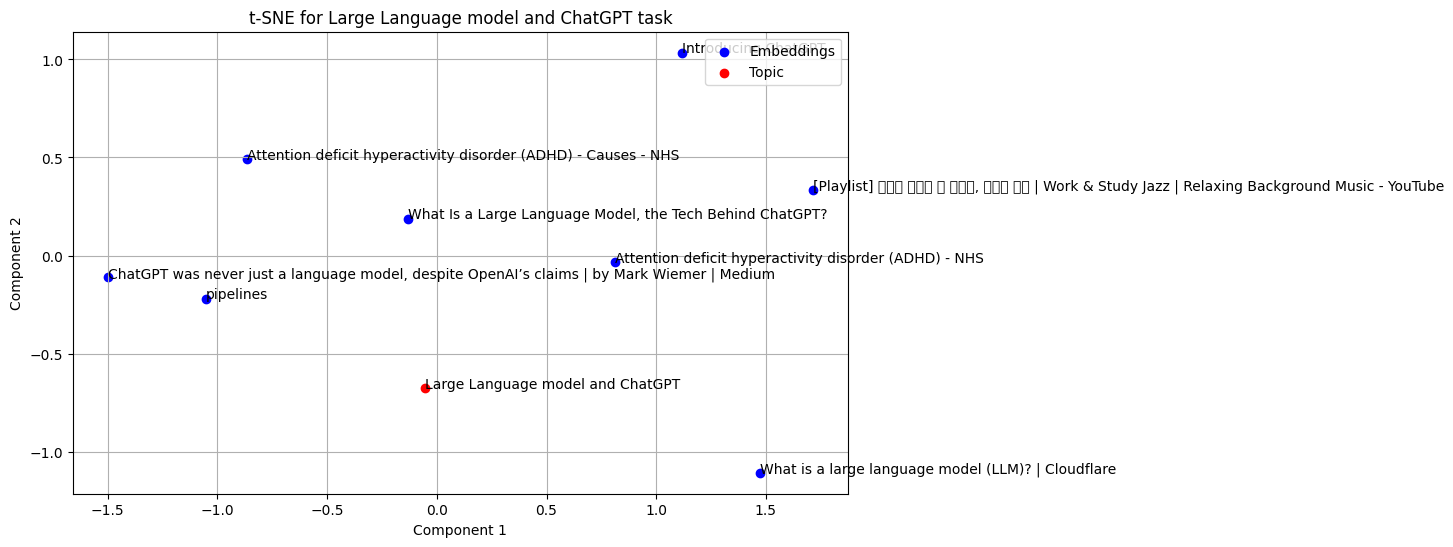

In [9]:
# draw the plot for the 2D array and the topic, topic use different color
plt.figure(figsize=(10, 6))
plt.scatter([x[0] for x in array_2d], [x[1] for x in array_2d], c='b', label='Embeddings')
plt.scatter([x[0] for x in topic_2d], [x[1] for x in topic_2d], c='r', label='Topic')

# Add titles as annotations for embeddings
for i, t in enumerate(title):
    plt.annotate(t, (array_2d[i][0], array_2d[i][1]))

# Add task topics as annotations for the input array
for i, t in enumerate(topic):
    plt.annotate(t, (topic_2d[i][0], topic_2d[i][1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE for Large Language model and ChatGPT task')
plt.legend()
plt.grid(True)

    